In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

In [2]:
df = pd.read_json('../ultimate_challenge/logins.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


Okay so here we can see that there is no other information in this data other than the timestamp for logins to the Ultimate app.  The first step in this process is to aggregate these logins into 15 minute intervals with a count for the number of logins in each interval period. 

In [5]:
q_hour = df.resample('15min', on='login_time').count()

In [6]:
q_hour.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [8]:
q_hour = q_hour.rename(columns={'login_time':'count'})
q_hour.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


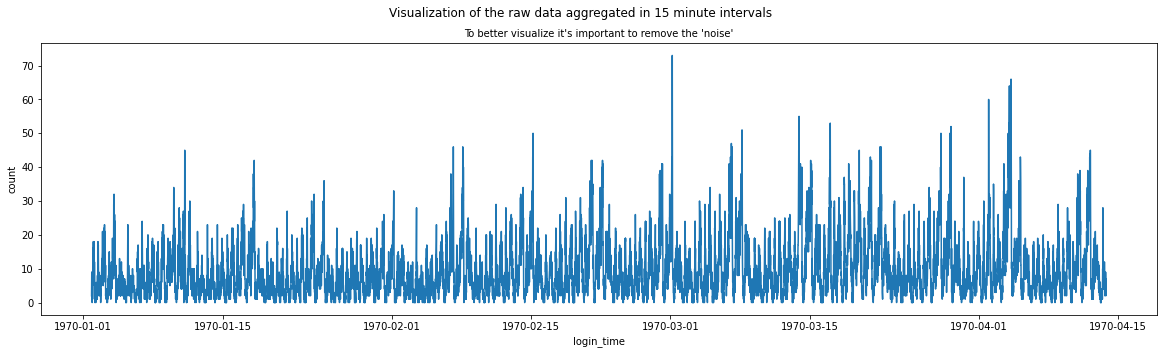

In [9]:
x = q_hour.index
y = q_hour['count']
plt.figure(figsize=(20,5))
sns.lineplot(x=x, y=y)
plt.suptitle('Visualization of the raw data aggregated in 15 minute intervals', size='large')
plt.title("To better visualize it's important to remove the 'noise'", size='medium');

Here we can see that this is a time series with what appears to be a constant trend (mean), however the standard deviation appears to be non-stationary, and potentially with multiplicative seasonality.   

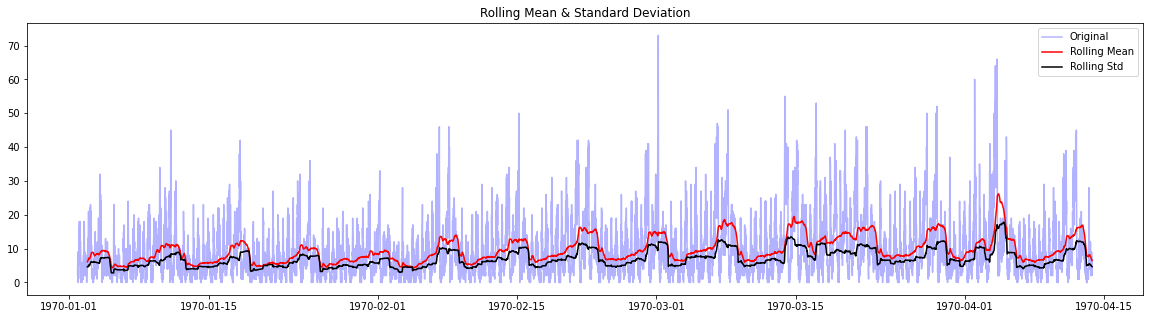

In [17]:
# Settiing up a 24-hour rolling mean and standard deviation for the data.
rolling_mean = q_hour.rolling(window=96).mean()
rolling_std = q_hour.rolling(window=96).std()
fig = plt.figure(figsize=(20,5))
orig = plt.plot(q_hour, color='blue',label='Original', alpha=0.3)
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

Here we can see the 24-hour rolling mean and standard deviation and it's apparent that while there is some variance in the rolling mean over the time period examined, mirrored by the change in the standard deviation. 

Next I want to see how much 'noise' is reduced if we expand the 24 hour rolling window to 48 hours. This should in theory still retain the weekend spikes that are noticable in the above graph, while producing a much smoother trend. 

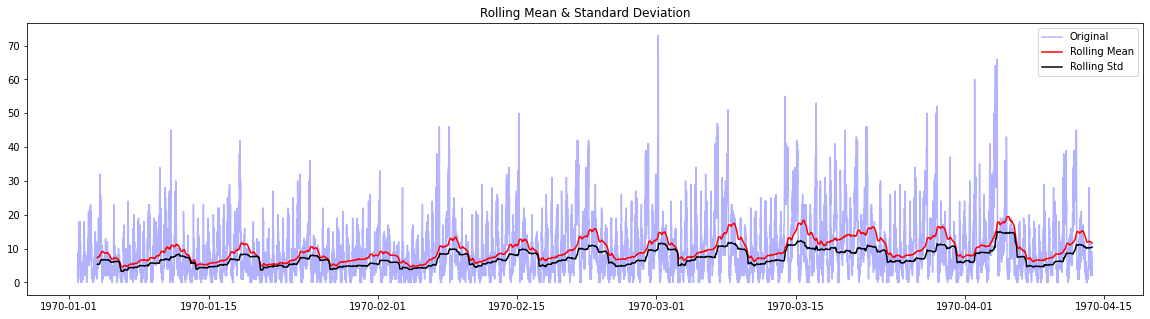

In [18]:
# Creating a 48-hour rolling window to compute the mean & standard deviation over
rolling_mean = q_hour.rolling(window=192).mean()
rolling_std = q_hour.rolling(window=192).std()
fig = plt.figure(figsize=(20,5))
orig = plt.plot(q_hour, color='blue',label='Original', alpha=0.3)
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()